Open the dataset blood_transfusion.csv with the following command:
```
import pandas as pd

blood_transfusion = pd.read_csv("../datasets/blood_transfusion.csv")
target_name = "Class"
data = blood_transfusion.drop(columns=target_name)
target = blood_transfusion[target_name]
```
blood_transfusion is a pandas dataframe. The column "Class" contains the target variable.

_Hint:_ `target.unique()`, and `target.value_counts()` are methods that are helpful to answer to this question.

In [1]:
import pandas as pd

blood_transfusion = pd.read_csv("../datasets/blood_transfusion.csv")
target_name = "Class"
data = blood_transfusion.drop(columns=target_name)
target = blood_transfusion[target_name]

(<AxesSubplot: >,
 not donated    570
 donated        178
 Name: Class, dtype: int64)

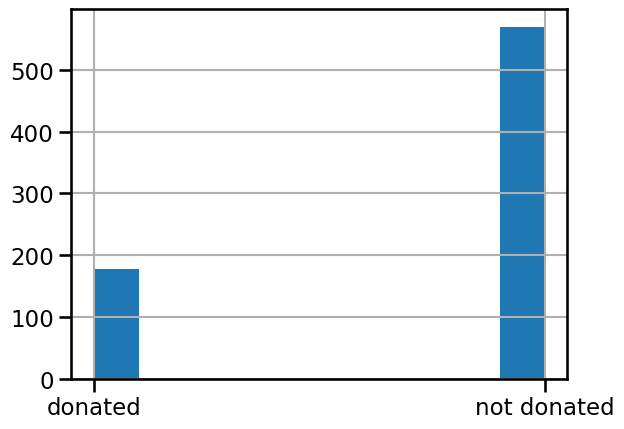

In [3]:
target.hist(), target.value_counts()

Using a `sklearn.dummy.DummyClassifier` and the strategy `"most_frequent"`, what is the average of the accuracy scores obtained by performing a 10-fold cross-validation?  
_Hint:_ You can check the documentation of `sklearn.model_selection.cross_val_score` here and `sklearn.model_selection.cross_validate` here.

In [15]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import ShuffleSplit, cross_validate

dummy = DummyClassifier(strategy="most_frequent")

cv = ShuffleSplit(random_state=0)
cv_results = cross_validate(dummy, data, target, cv=cv, n_jobs=2)
cv_results = pd.DataFrame(cv_results)
print(cv_results)
print(
    f"Accuracy score of our model:\n"
    f"{cv_results['test_score'].mean():.3f} ± "
    f"{cv_results['test_score'].std():.3f}"
)

   fit_time  score_time  test_score
0  0.001001    0.000000    0.666667
1  0.001001    0.000000    0.746667
2  0.001001    0.000000    0.773333
3  0.001001    0.000000    0.813333
4  0.000999    0.000000    0.733333
5  0.000000    0.001001    0.746667
6  0.001001    0.000000    0.760000
7  0.001000    0.000000    0.800000
8  0.001000    0.000000    0.800000
9  0.001001    0.000000    0.773333
Accuracy score of our model:
0.761 ± 0.042


Repeat the previous experiment but compute the balanced accuracy instead of the accuracy score. Pass `scoring="balanced_accuracy"` when calling `cross_validate` or `cross_val_score` functions, the mean score is:

In [7]:
dummy = DummyClassifier(strategy="most_frequent")

cv = ShuffleSplit(random_state=0)
cv_results = cross_validate(dummy, data, target, cv=cv, n_jobs=2, scoring="balanced_accuracy")
cv_results = pd.DataFrame(cv_results)
print(cv_results)
print(
    f"Accuracy score of our model:\n"
    f"{cv_results['test_score'].mean():.3f} ± "
    f"{cv_results['test_score'].std():.3f}"
)

   fit_time  score_time  test_score
0  0.000000    0.001001         0.5
1  0.001001    0.000000         0.5
2  0.001001    0.000000         0.5
3  0.000999    0.000000         0.5
4  0.000000    0.000000         0.5
5  0.001002    0.000000         0.5
6  0.000000    0.000000         0.5
7  0.001001    0.000000         0.5
8  0.000000    0.000000         0.5
9  0.000000    0.000000         0.5
Accuracy score of our model:
0.500 ± 0.000


We will use a `sklearn.neighbors.KNeighborsClassifier` for the remainder of this quiz.

Why is it relevant to add a preprocessing step to scale the data using a `StandardScaler` when working with a `KNeighborsClassifier`?  
**k-nearest neighbors is based on computing some distances. Features need to be normalized to contribute approximately equally to the distance computation.**

Create a scikit-learn pipeline (using `sklearn.pipeline.make_pipeline`) where a `StandardScaler` will be used to scale the data followed by a `KNeighborsClassifier`. Use the default hyperparameters.

Inspect the parameters of the created pipeline. What is the value of K, the number of neighbors considered when predicting with the k-nearest neighbors?

In [9]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

kmodel = make_pipeline(StandardScaler(), KNeighborsClassifier())
kmodel.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('kneighborsclassifier', KNeighborsClassifier())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'kneighborsclassifier': KNeighborsClassifier(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'kneighborsclassifier__algorithm': 'auto',
 'kneighborsclassifier__leaf_size': 30,
 'kneighborsclassifier__metric': 'minkowski',
 'kneighborsclassifier__metric_params': None,
 'kneighborsclassifier__n_jobs': None,
 'kneighborsclassifier__n_neighbors': 5,
 'kneighborsclassifier__p': 2,
 'kneighborsclassifier__weights': 'uniform'}

In [10]:
cv = ShuffleSplit(random_state=0)
cv_results = cross_validate(kmodel, data, target, cv=cv, n_jobs=2, scoring="balanced_accuracy", return_train_score=True)
cv_results = pd.DataFrame(cv_results)
print(cv_results)
print(
    f"Accuracy score of our model:\n"
    f"{cv_results['test_score'].mean():.3f} ± "
    f"{cv_results['test_score'].std():.3f}"
)

   fit_time  score_time  test_score  train_score
0  0.003001    0.003003    0.660000     0.670500
1  0.003001    0.002002    0.683271     0.684880
2  0.003002    0.004004    0.645538     0.688094
3  0.003004    0.004002    0.574356     0.703526
4  0.004004    0.004004    0.643182     0.688509
5  0.003003    0.002002    0.533365     0.698205
6  0.003002    0.004004    0.631579     0.691259
7  0.003003    0.004003    0.533333     0.700776
8  0.004004    0.004003    0.508333     0.700776
9  0.003003    0.004004    0.586714     0.689872
Accuracy score of our model:
0.600 ± 0.061


Set `n_neighbors=1` in the previous model and evaluate it using a 10-fold cross-validation. Use the balanced accuracy as a score. What can you say about this model? Compare the average of the train and test scores to argument your answer

_Hint:_ compute the average test score and the average train score and compare them. Make sure to pass `return_train_score=True` to the `cross_validate` function to also compute the train score

In [11]:
kmodel = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=1))
cv = ShuffleSplit(n_splits=10, random_state=0)
cv_results = cross_validate(kmodel, data, target, cv=cv, n_jobs=2, scoring="balanced_accuracy", return_train_score=True)
cv_results = pd.DataFrame(cv_results)
print(cv_results)
print(
    f"Accuracy score of our model:\n"
    f"{cv_results['test_score'].mean():.3f} ± "
    f"{cv_results['test_score'].std():.3f}"
)

   fit_time  score_time  test_score  train_score
0  0.003003    0.002002    0.610000     0.861582
1  0.002001    0.003003    0.594455     0.867723
2  0.002002    0.002002    0.605984     0.873708
3  0.003003    0.003003    0.516979     0.879642
4  0.002002    0.003003    0.618182     0.868889
5  0.002002    0.002002    0.603383     0.885911
6  0.003003    0.003003    0.618421     0.878679
7  0.003003    0.002002    0.516667     0.877710
8  0.002002    0.002002    0.508333     0.885078
9  0.002002    0.002002    0.623225     0.865289
Accuracy score of our model:
0.582 ± 0.047


We will now study the effect of the parameter `n_neighbors` on the train and test score using a validation curve. You can use the following parameter range:
```
param_range = [1, 2, 5, 10, 20, 50, 100, 200, 500]
```
Also, use a 5-fold cross-validation and compute the balanced accuracy score instead of the default accuracy score (check the scoring parameter). Finally, plot the average train and test scores for the different value of the hyperparameter. We recall that the name of the parameter can be found using `model.get_params()`

In [12]:
kmodel = make_pipeline(StandardScaler(), KNeighborsClassifier())
kmodel.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('kneighborsclassifier', KNeighborsClassifier())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'kneighborsclassifier': KNeighborsClassifier(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'kneighborsclassifier__algorithm': 'auto',
 'kneighborsclassifier__leaf_size': 30,
 'kneighborsclassifier__metric': 'minkowski',
 'kneighborsclassifier__metric_params': None,
 'kneighborsclassifier__n_jobs': None,
 'kneighborsclassifier__n_neighbors': 5,
 'kneighborsclassifier__p': 2,
 'kneighborsclassifier__weights': 'uniform'}

In [13]:
from sklearn.model_selection import validation_curve

kmodel = make_pipeline(StandardScaler(), KNeighborsClassifier())
cv = ShuffleSplit(n_splits=5, random_state=0)
param_name = "kneighborsclassifier__n_neighbors"
neighbors = [1, 2, 5, 10, 20, 50, 100, 200, 500]
train_scores, test_scores = validation_curve(
    kmodel, data, target, param_name=param_name, param_range=neighbors, cv=cv,
    n_jobs=2)

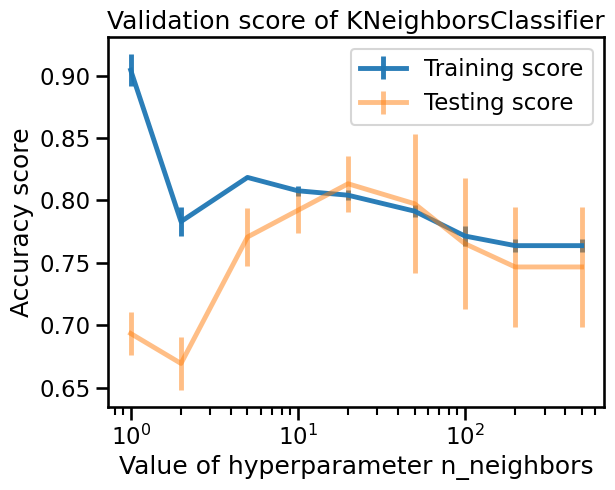

In [14]:
import matplotlib.pyplot as plt

plt.errorbar(
    neighbors,
    train_scores.mean(axis=1),
    yerr=train_scores.std(axis=1),
    alpha=0.95,
    label="Training score",
)
plt.errorbar(
    neighbors,
    test_scores.mean(axis=1),
    yerr=test_scores.std(axis=1),
    alpha=0.5,
    label="Testing score",
)
plt.legend()

plt.xscale("log")
plt.xlabel(r"Value of hyperparameter n_neighbors")
plt.ylabel("Accuracy score")
_ = plt.title("Validation score of KNeighborsClassifier")